<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/ML.jpg" alt="Drawing" style="width:1000px;">



# <center> **06. Machine learning: Other classifiers** </center>
    
## **Outline**

[1. **Decision Trees (DT)**](#eje1)

[2. **Random Forest (RF)**](#eje2)

[3. **Support vector Machine (SVM)**](#eje3)



In [2]:
#@title **MONTAR EL DRIVE** { display-mode: "form" }
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/course-IA1/ai-uis-student')
print(os.getcwd())

Mounted at /content/drive
/content/drive/My Drive/course-IA1/ai-uis-student


In [1]:
#@title 2. **LOAD LIB** { display-mode: "form" }
from __future__ import division, print_function, unicode_literals #py2 and py3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
sns.set_theme()
from sklearn.model_selection import KFold
from sklearn.metrics import *

(1372, 5)
(1372, 4) (1372,)


varwt   skewt   curwt   entrwt  class
0  3.62160  8.6661 -2.8073 -0.44699      0
1  4.54590  8.1674 -2.4586 -1.46210      0
2  3.86600 -2.6383  1.9242  0.10645      0
3  3.45660  9.5228 -4.0112 -3.59440      0
4  0.32924 -4.4552  4.5718 -0.98880      0

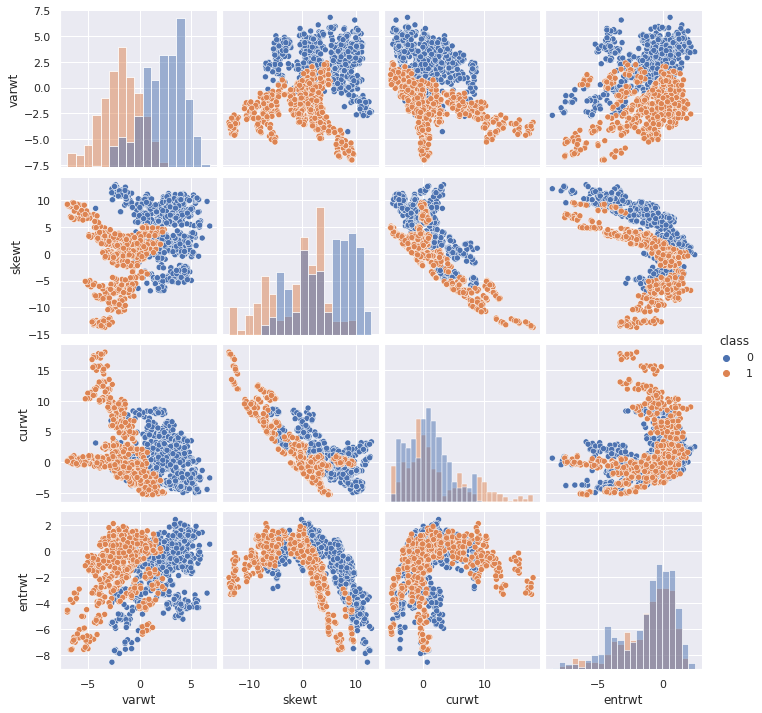

In [5]:
#@title **code** Read dataset and split into features and labels
d = pd.read_csv("data/data_banknote_authentication.txt.gz")
print(d.shape)
X = d.values[:,:-1]
y = d.values[:,-1]
sns.pairplot(d, hue="class", diag_kind="hist");# kind="kde"
print(X.shape, y.shape)
d.head()

### **Remember some classification metrics**
let's understand better how this estimator is performing.

- TPR: true positive rate (sensitivity), e.g.,  the percentage of sick people who are correctly identified as having the condition
- TNR: true negative rate (specificity), e.g., the percentage of healthy people who are correctly identified as not having the condition

From Wiki: 

- True positive: Sick people correctly identified as sick
- False positive: Healthy people incorrectly identified as sick
- True negative: Healthy people correctly identified as healthy
- False negative: Sick people incorrectly identified as healthy

In general

- True positive = correctly identified
- False positive = incorrectly identified
- True negative = correctly rejected
- False negative = incorrectly rejected

In [ ]:
#@title **code**
def tpr(est,X,y):
    p = est.predict(X)
    return np.mean (p[y==1] == y[y==1])

def tnr(est,X,y):
    p = est.predict(X)
    return np.mean(p[y==0] == y[y==0])

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">

- Which is the accuracy in terms od TP, FP, TN, FN ?

# **1. Decision Tree classifier**  <a name="eje1"></a>

The idea is to create a model that predicts the value of a target variable based on several input variables. The observations about an item is represented in the branches and the conclusions about the item's target value represented in the leaves


- Tree models where the target variable can take a discrete set of values are called **classification trees**
- Decision trees where the target variable can take continuous values (typically real numbers) are called **regression trees**

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/-/raw/master/imgs/CART_tree_titanic_survivors.png" width="700">


- During **training** a set of thresholds are learned from several optimization algorithm (entropy, gini_inpurity). The number of thresholds define the levels of each decision tree. 

- DT can understood as `if-then` structures that split recursively a feature
- Classification trees are a greedy algorithm which means by default it will continue to split until it has a pure node. 

- The DT may be sensible because their random initialization and construction of trees. With `random_state=0` you obtain a pseudo-random experiment. 
- Observe the natural implementation from `sklearn`

In [ ]:
#@title **code: working with decision trees**
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

est = DecisionTreeClassifier(max_depth=2)

s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))
s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=tpr)
print("tpr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))
s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=tnr)
print("tnr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

accuracy 0.912 (+/- 0.02455)
tpr      0.881 (+/- 0.03497)
tnr      0.935 (+/- 0.01709)


**Many times is useful to know what features are more important to classify!**

In [ ]:
#@title **code**
est.fit(X,y)
est.feature_importances_

array([0.58570569, 0.24146014, 0.15314022, 0.01969395])

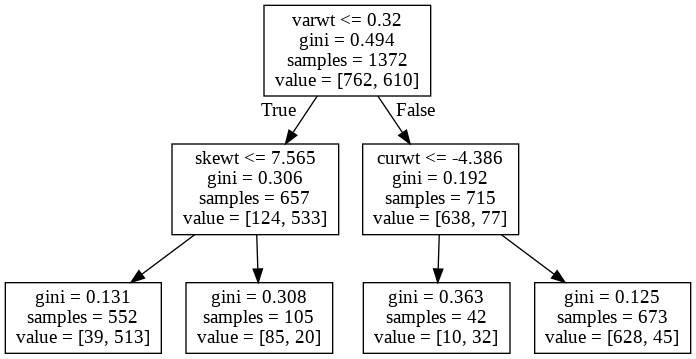

In [ ]:
#@title **code** Visualize the resultant tree
#!sudo apt-get install graphviz
from sklearn.tree import export_graphviz
from IPython.display import Image
est.fit(X, y)
export_graphviz(est, out_file='tree_c.dot', feature_names=d.columns[:-1].values)
!dot -Tpng tree_c.dot > tree_c.png

Image(filename='tree_c.png') 

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">

- Perform a classification using the most detected important features. Which classifier is best?

- Drawn the restulant tree for the best configuration

- Change hyperparameters of DT to observe performance


# **2. Random Forest classifier (RFC)** <a name="eje2"></a>

Many times the tree is dependent of features initialization and the output can be sensible. To overcome some of these problems, a set of trees can be built to perform the classification. Each tree give a result an agreement criteria is used to obtain the classification


<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/-/raw/master/imgs/randomforest.jpeg" width="500">


In [ ]:
#@title **code** Implementing a Random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

est = RandomForestClassifier()

s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))
s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=tpr)
print("tpr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))
s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=tnr)
print("tnr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

accuracy 0.992 (+/- 0.01055)
tpr      0.993 (+/- 0.01528)
tnr      0.992 (+/- 0.00890)


# **3. Support vector machine (SVM)** <a name="eje3"></a>

This strategy is one of the most know machine learning thecnique. It is based on learn a model to separate two classes, which are represented as vectors. 

- The examples are used to find best vectors **(support vectors)** that better split the learning space. This support vectors are closer to the hiperplane. 

- The **main** goal is to **maximize** the classifier margin, described between the **support vectors**

- Example: 
    - H1 **No** separa las clases
    - H2 perform a separation with little margin
    - H3 bult boundaries that separate both classes with maximum margin
- **Marginn**: maximum distance between the hiperplane and data

<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/-/raw/master/imgs/svm_diagram.png" width="1000">


In [ ]:
#@title **code** SVM classification
#X = d.values[:,:-1]
#y = d.values[:,-1]

#X = d.values[:,:-3]
#y = d.values[:,-1]

from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

est = SVC()

s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))
s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=tpr)
print("tpr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))
s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=tnr)
print("tnr      %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

accuracy 0.997 (+/- 0.00484)
tpr      1.000 (+/- 0.00000)
tnr      0.996 (+/- 0.00589)


<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-2-uis-student/-/raw/master/imgs/icon1.png" width="200">

- Now, we have fourt different classifiers, that lies on different hypothesis to classify samples. 
- Use every classfier to acess on **breast** cancer dataset, using a train-test split (80-20), but also using a kfold-cross validation, with K=10. 

- Report the results. 




mean radius  mean texture  ...  worst fractal dimension  diagnosis
0        17.99         10.38  ...                  0.11890        0.0
1        20.57         17.77  ...                  0.08902        0.0

[2 rows x 31 columns]

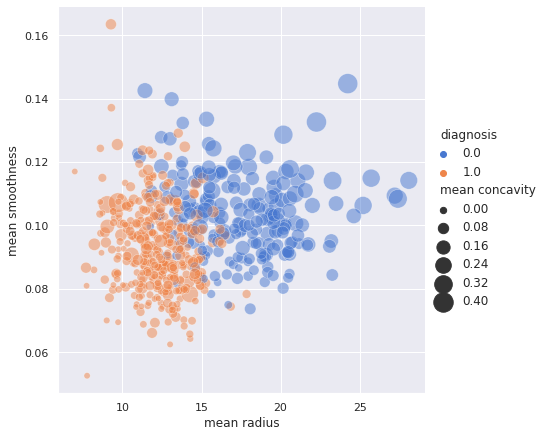

In [ ]:
#@title **Breast cancer dataset**
variable_x = "mean radius" #@param {type:"string"}
variable_y = "mean smoothness" #@param {type:"string"}
variable_s = "mean concavity" #@param {type:"string"}


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
sns.set_theme()


cancer = load_breast_cancer()
data_bc = pd.DataFrame(np.c_[cancer['data'], cancer['target']],
                  columns= np.append(cancer['feature_names'], ['diagnosis']))
sns.relplot(x=variable_x, y=variable_y, hue="diagnosis", size=variable_s,
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=data_bc)

data_bc.head(2)

# References

[1] Tutorial on k-fold cross validation https://machinelearningmastery.com/k-fold-cross-validation/

[2] Titanic dataset. https://www.kaggle.com/c/titanic

[3] Sensitivity and specificity: https://en.wikipedia.org/wiki/Sensitivity_and_specificity

---
<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/bannerThanks.jpg" alt="Drawing" style="width:700px;">
